# DBSCAN Parameter Search

In [1]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Pre-Processed data import

In [2]:
ndims = 300
column_names = list(range(ndims))
df = pd.read_csv('docs_vector.csv', names = ['Index'] + column_names, index_col = 0, header=None)
df.head()

# Normalization
from sklearn import preprocessing
df = preprocessing.normalize(df, norm='l2', axis=1, copy=False, return_norm=False)
df = pd.DataFrame(df)
print('Data shpape: ', df.shape)
df.head()

Data shpape:  (51715, 300)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.104800,0.067374,-0.007563,0.078689,-0.034016,0.011923,-0.052252,-0.024321,-0.027407,0.015229,...,0.044131,0.003494,-0.056048,0.050570,-0.016011,-0.095486,-0.068875,-0.014062,-0.067393,0.082839
1,-0.099761,0.063995,-0.002941,0.081860,-0.031225,0.011352,-0.053607,-0.022655,-0.030922,0.016970,...,0.045404,0.000528,-0.057001,0.051244,-0.017411,-0.093238,-0.069151,-0.010103,-0.070342,0.081448
2,-0.106069,0.066504,-0.002576,0.080089,-0.030978,0.008891,-0.042810,-0.026989,-0.027736,0.012572,...,0.044403,0.006679,-0.058899,0.053263,-0.023295,-0.103764,-0.067405,-0.012665,-0.061347,0.090979
3,-0.107032,0.070473,-0.005630,0.076993,-0.033485,0.015500,-0.048176,-0.031846,-0.025859,0.011948,...,0.039869,0.007897,-0.063938,0.050105,-0.015554,-0.099345,-0.063351,-0.015247,-0.060628,0.087411
4,-0.101527,0.065760,-0.004314,0.076342,-0.037384,0.017309,-0.049499,-0.029318,-0.030110,0.015880,...,0.043400,0.004169,-0.052330,0.052160,-0.019855,-0.096451,-0.062877,-0.016220,-0.069331,0.080087


### Write K-distances into files varying K : 
(Heavy Processing: done in MCSR with separate file dbscan_parameter_search.py

In [ ]:
#K = 4, 6, 10
K = 4
nbrs = NearestNeighbors(n_neighbors=K).fit(df)
distances, indices = nbrs.kneighbors(df)
distanceDec = sorted(distances[:,K-1], reverse=False)
filename = './Status/' + str(K) + '_dbs_prm_dbscan_parameter_search.py.out'
np.savetxt(filename, distanceDec, delimiter = ',')


### K-distance graph read from post-processed file (300 dims)

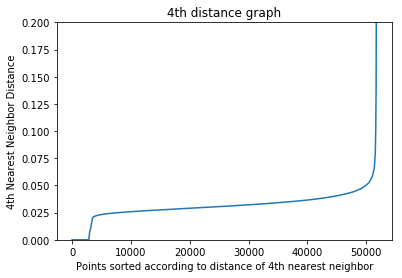

In [3]:
K = 4

filename = './Status/' + str(K) + '_dbs_prm_dbscan_parameter_search.py.out'
distanceDec = np.genfromtxt(filename, delimiter=',', dtype=None)

#print(distanceDec[10000:10500])
plt.plot(list(range(1,df.shape[0]+1)), distanceDec)
plt.xlabel('Points sorted according to distance of ' + str(K) + 'th nearest neighbor')
plt.title(str(K)+'th distance graph')
plt.ylabel(str(K) + 'th Nearest Neighbor Distance')
plt.ylim([0, 0.2])
plt.show()


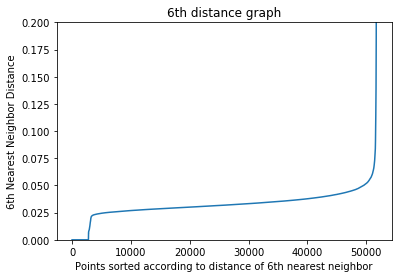

In [4]:
K = 6

filename = './Status/' + str(K) + '_dbs_prm_dbscan_parameter_search.py.out'
distanceDec = np.genfromtxt(filename, delimiter=',', dtype=None)

#print(distanceDec[10000:10500])
plt.plot(list(range(1,df.shape[0]+1)), distanceDec)
plt.xlabel('Points sorted according to distance of ' + str(K) + 'th nearest neighbor')
plt.title(str(K)+'th distance graph')
plt.ylabel(str(K) + 'th Nearest Neighbor Distance')
plt.ylim([0, 0.2])
plt.show()

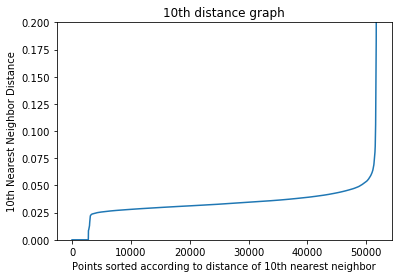

In [6]:
K = 10

filename = './Status/' + str(K) + '_dbs_prm_dbscan_parameter_search.py.out'
distanceDec = np.genfromtxt(filename, delimiter=',', dtype=None)

#print(distanceDec[10000:10500])
plt.plot(list(range(1,df.shape[0]+1)), distanceDec)
plt.xlabel('Points sorted according to distance of ' + str(K) + 'th nearest neighbor')
plt.title(str(K)+'th distance graph')
plt.ylabel(str(K) + 'th Nearest Neighbor Distance')
plt.ylim([0, 0.2])
plt.show()

### K-distance graph read from post-processed file (5 dims using PCA)

In [5]:
ndims = 5
column_names = list(range(ndims))
df_reduced = pd.read_csv('docs_vector_reduced.csv', names = ['Index'] + column_names, index_col = 0, header=None)
df_reduced.head()

# Normalization
from sklearn import preprocessing
df_reduced = preprocessing.normalize(df_reduced, norm='l2', axis=1, copy=False, return_norm=False)
df_reduced = pd.DataFrame(df_reduced)
print('Data shpape: ', df_reduced.shape)
df_reduced.head()

Data shpape:  (51716, 5)


,0,1,2,3,4
0,0.000000,0.182574,0.365148,0.547723,0.730297
1,-0.597218,-0.700543,-0.129331,-0.296102,-0.219470
2,-0.129919,0.110543,0.216261,0.484514,-0.830288
3,-0.361706,-0.206133,0.531634,-0.702779,0.223931
4,-0.361078,-0.421106,-0.276431,-0.780486,-0.081972


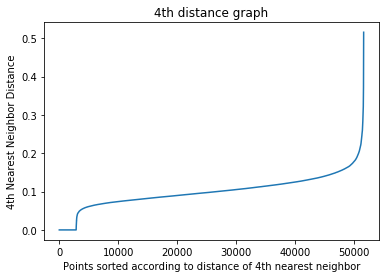

In [8]:
K = 4

filename = './Status/' + str(K) + '_dbs_prm_dbscan_parameter_search_pca.py.out'
distanceDec = np.genfromtxt(filename, delimiter=',', dtype=None)

#print(distanceDec[10000:10500])
plt.plot(list(range(1,df_reduced.shape[0]+1)), distanceDec)
plt.xlabel('Points sorted according to distance of ' + str(K) + 'th nearest neighbor')
plt.title(str(K)+'th distance graph')
plt.ylabel(str(K) + 'th Nearest Neighbor Distance')
#plt.ylim([0, 0.2])
plt.show()

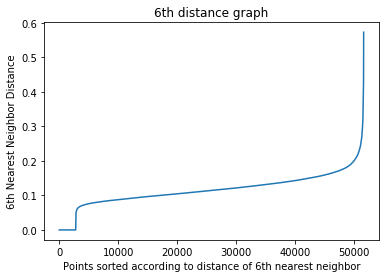

In [9]:
K = 6

filename = './Status/' + str(K) + '_dbs_prm_dbscan_parameter_search_pca.py.out'
distanceDec = np.genfromtxt(filename, delimiter=',', dtype=None)

#print(distanceDec[10000:10500])
plt.plot(list(range(1,df_reduced.shape[0]+1)), distanceDec)
plt.xlabel('Points sorted according to distance of ' + str(K) + 'th nearest neighbor')
plt.title(str(K)+'th distance graph')
plt.ylabel(str(K) + 'th Nearest Neighbor Distance')
#plt.ylim([0, 0.2])
plt.show()